# Pandas and Matplotlib Homework

In [1]:
#load the libraries using the normal convention
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
##prevent plotting errors
%matplotlib inline

In [ ]:
#Load our excel files of interest into pandas
NHL_Goalies = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname=0) 
GAA_ = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname='5vs5')

#Appendix:
 1. DF = Pandas DataFrame
 2. NHL_Goalies DF = NHL_Goalies 
 3. GAA_ DF = GAA_

### Q1A) Create a new DF (*called NHL_Ones*) by:
#### Filtering the correct DF for Goalies that played 1 game <font color='red'> (GP = Games played)</font>

Notes: How would you find the 'GP' column in these files?

In [158]:
NHL_Goalies = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname=0) 
#NHL_Ones = NHL_Goalies.loc[':,14']

NHL_Ones = NHL_Goalies[NHL_Goalies['GP']==1]
NHL_Ones.head()



C:\Users\mahru\AppData\Local\conda\conda\envs\itpf_2018\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,Last Name,First Name,Team,DOB,Birth City,S/P,Cntry,Nat,Ht,Wt,...,Cap Hit,Pace,1st,2nd,3rd,Star,GPS,Ginj,Injuries,CHIP
1,Alves,Jorge,CAR,1979-01-30,Boston,MA,USA,USA,69,185,...,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,
13,Campbell,Jack,LAK,1992-01-09,Port Huron,MI,USA,USA,74,197,...,NaN,96.000000,NaN,NaN,NaN,NaN,0.1,NaN,NaN,
14,Comrie,Eric,WPG,1995-07-06,Edmonton,AB,CAN,CAN,73,175,...,645000.0,124.451939,NaN,NaN,NaN,NaN,0.2,NaN,NaN,
16,Copley,Pheonix,STL,1992-01-18,North Pole,AK,USA,USA,76,196,...,708750.0,104.864253,NaN,NaN,NaN,NaN,-0.1,NaN,NaN,
22,Driedger,Chris,OTT,1994-05-18,Winnipeg,MB,CAN,CAN,76,205,...,755000.0,123.000000,NaN,NaN,NaN,NaN,-0.2,NaN,NaN,


 ## Q1B) 
 #### A. Find the value of the minimum Salary for the entire dataset 
 #### B. Replace the missing values from the NHL_Ones DF with this
 #### C. Create a new DF after replacement by **adding** a column called  "Adjusted_Salary"
 #### D. I would like to only see the old "Salary" column and the "Adjusted Salary" column from the new Dataframe

#### Notes:
1. Note where the minimum Salary value is coming & where you are going to assign it to
2. Read up on **replacement** of missing values
3. Look up Numpy definition for null
4. Look up Pandas **Series** Naming 
5. Review concat function in Pandas
6. Review how to slice columns

In [237]:
#Answer 1B:

salary = NHL_Goalies["Salary"].min()
print ("minimum salary =",salary)


#Extract the salary column of NHL_Ones
Adjusted_Salary = NHL_Ones.Salary.fillna("575000")


#Adjusted_Salary.head()


#Concatenation step: 

data_to_merge = [NHL_Ones, Adjusted_Salary]
result = pd.concat([NHL_Ones, Adjusted_Salary], axis=1).rename(columns={'Salary' : 'Adjusted Salary'})
result.head()

result[['Adjusted Salary']].head(15)
  # How do I go about naming the first column simply Salary??? 
    


minimum salary = 575000.0


,Adjusted Salary,Adjusted Salary
1,NaN,575000
13,NaN,575000
14,575000.0,575000
16,708750.0,708750
22,780000.0,780000
27,650000.0,650000
29,925000.0,925000
32,NaN,575000
42,575000.0,575000
50,673334.0,673334


### Q2) A. Subset the NHL goalies data to include Goalies that played in more than 25 games AND have a GAA lower than 3.00 and store the New DF as 'workhorse'


Notes: 
1. Review notes creating "boolean" masks
2. Internet search for Multiple Boolean indexing on multiple columns in a Pandas DataFrame

In [242]:
#Answer 2:

workhorse = NHL_Goalies[(NHL_Goalies['GP']>25) & (NHL_Goalies['GAA']<3.00)]
workhorse.head(44)  #checked using .shape method, how many 'rows' there were and added those into the .head method



,Last Name,First Name,Team,DOB,Birth City,S/P,Cntry,Nat,Ht,Wt,...,Cap Hit,Pace,1st,2nd,3rd,Star,GPS,Ginj,Injuries,CHIP
0,Allen,Jake,STL,1990-08-07,Fredericton,NB,CAN,CAN,74,203,...,2350000.0,104.033662,9.0,7.0,6.0,22.0,9.8,NaN,NaN,
2,Andersen,Frederik,TOR,1989-10-02,Herning,NaN,DNK,DNK,76,230,...,5000000.0,118.931391,9.0,6.0,6.0,21.0,13.1,2.0,Upper body,121951
3,Anderson,Craig,OTT,1981-05-21,Park Ridge,IL,USA,USA,74,187,...,4200000.0,114.858819,8.0,2.0,5.0,15.0,9.2,2.0,Lower body,102439
5,Bernier,Jonathan,ANA,1988-08-07,Laval,QC,CAN,CAN,72,184,...,4150000.0,113.938340,5.0,0.0,2.0,7.0,6.0,3.0,Upper body,151829
9,Bishop,Ben,"TBL, LAK",1986-11-21,Denver,CO,USA,USA,79,216,...,5950000.0,108.466747,0.0,1.0,5.0,6.0,5.7,9.0,Lower body,653049
10,Bobrovsky,Sergei,CBJ,1988-09-20,Novokuznetsk,NaN,RUS,RUS,74,182,...,7425000.0,109.525950,17.0,6.0,6.0,29.0,14.9,2.0,Illness,181098
12,Budaj,Peter,"LAK, TBL",1982-09-18,Banská Bystrica,NaN,SVK,SVK,73,196,...,600000.0,108.110995,4.0,7.0,4.0,15.0,8.6,NaN,NaN,
15,Condon,Mike,"PIT, OTT",1990-04-27,Holliston,MA,USA,USA,74,197,...,575000.0,112.079733,9.0,1.0,4.0,14.0,6.8,NaN,NaN,
18,Crawford,Corey,CHI,1984-12-31,Montreal,QC,CAN,CAN,74,216,...,6000000.0,112.428393,8.0,5.0,0.0,13.0,11.0,11.0,"Appendectomy, Illness",804878
19,Darling,Scott,CHI,1988-12-22,Newport News,VA,USA,USA,78,232,...,587500.0,109.476386,5.0,5.0,5.0,15.0,6.2,5.0,Upper body,35823.2


### Q3. Create 2 python functions that: 
<br> </br>
#### A. Creates/*Returns* a new DataFrame that displays the number of missing values in every column. 
#### This new DataFrame has one new column named "Missing" with the sum of the missing values from the columns

### Notes 
***Function takes one argument: An input DataFrame***
<br> </br>
<br> </br>
** One Proposed method:**
1. Create a pandas series object from the sum of the nulls in every column
2. Convert the series object to a DataFrame and pass the list of column names from the input DataFrame as the index. (read Pandas Help online)
3. During the conversion of the series object to a DataFrame pass a columns argument to create a name for the new Output DataFrame's Column.

### Expected Output:
<img src='Missing_cols_expectedoutput.png'>

In [111]:
# Answer 3A: CODE HERE; Please comment each part
Missing_DF = pd.isnull(NHL_Goalies).sum()
Missing_DF = Missing_DF.to_frame(name='Missing')
Missing_DF.head(30)


,Missing
Last Name,0
First Name,0
Team,0
DOB,0
Birth City,0
S/P,34
Cntry,0
Nat,0
Ht,0
Wt,0


#### B. Creates a new *column* called 'missing_values' in the input DF that sums the missing values in each row.

### Notes: 
***Function takes one argument: An input DataFrame***
<br> </br>
<br> </br>
Check out how to use axis argument and how to create new columns in an existing dataframe

### Expected Output:
<img src= 'missingrows_expectedoutput.png'>

In [275]:
#Answer 3B here; Please comment each part
Missing_DF_Rows = pd.isnull(NHL_Goalies).sum(axis = 1)
Missing_DF_Rows = Missing_DF_Rows.to_frame(name='Missing_Values') #This data fram gives me the values that are missing in each row
Missing_DF_Rows.head() #This is just to visualize the data frame to see that everything looks like it is on track. 

#Now I need to merge this new dataframe, Missing_DF_Rows with the original dataframe, NHL_Goalies, to obtain the complete dataframe as shown in the picture. 
#I can use concat for this

merge = [NHL_Goalies, Missing_DF_Rows] #We make a list with the two dataframes that contains the complete data we want in the new dataframe
NHL_Goalies_With_Missing = pd.concat(merge, axis=1) #axis 1 means we are merging the columns

NHL_Goalies_With_Missing


,Last Name,First Name,Team,DOB,Birth City,S/P,Cntry,Nat,Ht,Wt,...,Pace,1st,2nd,3rd,Star,GPS,Ginj,Injuries,CHIP,Missing_Values
0,Allen,Jake,STL,1990-08-07,Fredericton,NB,CAN,CAN,74,203,...,104.033662,9.0,7.0,6.0,22.0,9.8,NaN,NaN,,3
1,Alves,Jorge,CAR,1979-01-30,Boston,MA,USA,USA,69,185,...,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,,18
2,Andersen,Frederik,TOR,1989-10-02,Herning,NaN,DNK,DNK,76,230,...,118.931391,9.0,6.0,6.0,21.0,13.1,2.0,Upper body,121951,2
3,Anderson,Craig,OTT,1981-05-21,Park Ridge,IL,USA,USA,74,187,...,114.858819,8.0,2.0,5.0,15.0,9.2,2.0,Lower body,102439,1
4,Bachman,Richard,VAN,1987-07-25,Salt Lake City,UT,USA,USA,70,183,...,113.421038,1.0,0.0,1.0,2.0,1.1,NaN,NaN,,3
5,Bernier,Jonathan,ANA,1988-08-07,Laval,QC,CAN,CAN,72,184,...,113.938340,5.0,0.0,2.0,7.0,6.0,3.0,Upper body,151829,1
6,Berra,Reto,FLA,1987-01-03,Bulach,NaN,CHE,CHE,76,210,...,108.457976,NaN,NaN,NaN,NaN,0.2,NaN,NaN,,8
7,Berube,Jean-Francois,NYI,1991-07-13,Repentigny,QC,CAN,CAN,73,177,...,114.005505,0.0,1.0,1.0,2.0,0.8,NaN,NaN,,3
8,Bibeau,Antoine,TOR,1994-05-01,Victoriaville,QC,CAN,CAN,75,210,...,130.294240,NaN,NaN,NaN,NaN,0.4,NaN,NaN,,7
9,Bishop,Ben,"TBL, LAK",1986-11-21,Denver,CO,USA,USA,79,216,...,108.466747,0.0,1.0,5.0,6.0,5.7,9.0,Lower body,653049,0


### Q4) Matplotlib Question Plot in one figure and 2 side by side plots:
<br> </br>
#### A. Plot the histogram of the all the GAA of the NHL_Goalies DF  AND the goalies that played in more than 25 games with a GAA < 3.00, 
#### B. Label the Titles of the plots differently (*ie EntireSet + Subset*)
#### C. Change the color of one of the plots from the default

# Notes

1. convert your column of interest into a NumPY array (look up online for usage)
2. Review: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html

C:\Users\mahru\AppData\Local\conda\conda\envs\itpf_2018\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


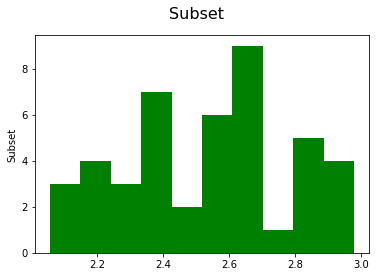

C:\Users\mahru\AppData\Local\conda\conda\envs\itpf_2018\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


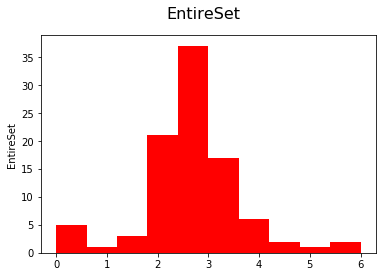

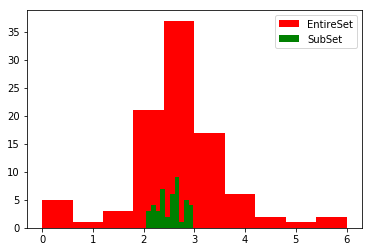

In [312]:
#Histogram of GAA of workforce (alone) (in green)
GAA_workhorse = workhorse.GAA #GAA_workhorse.head()# extracts the GAA column of workforce dataframe
GAA_workhorse.to_frame(name='GAA of workhorse')#convert float dtype GAA_workhorse from previous step to a dataframe
workhorse2 = GAA_workhorse.as_matrix() #converts the GAA_workhorse dataframe into a numpy array
#print(workhorse2)   - to check the numpy array



plt.hist(GAA_workhorse, color ='g')
plt.ylabel('Subset')
plt.suptitle('Subset', fontsize=16)
plt.show()


#Histogram of GAA from the entire data set of NHL_Goalies (in red)

GAA_NHL_Goalies = NHL_Goalies.GAA #NHL_Goalies.head()# extracts the GAA column of whole NHL_Goalies dataframe
GAA_NHL_Goalies.to_frame(name='GAA of NHL_Goalies')#convert float dtype GAA_NHL_Goalies from previous step to a dataframe
EntireSet = GAA_NHL_Goalies.as_matrix() #converts the GAA_NHL_Goalies dataframe into a numpy array
#print(EntireSet)   - to check the numpy array



plt.hist(EntireSet, color ='r')
plt.ylabel('EntireSet')
plt.suptitle('EntireSet', fontsize=16)
plt.show()


#Histogram of the two of them combined



plt.hist(EntireSet, color='r', label ='EntireSet') #Order in which we plot matters to prevent one graph from overlapping over the other one
plt.hist(workhorse2, color ='g', label = 'SubSet')#Label defines what we want to write in the legend
plt.legend(loc='upper right')  # location of the box that shows the legend
plt.show()



### Q5) GroupBy Question
##### 1. Subset the NHL_Goalies DataFrame where Injuries is not known <font color='red'>(Injuries=NaN)</font>; 
##### 2. Use a Merge with the GAA_  DF to produce a NEW DF (*called mergedDF*) 
###### *** USE A JOIN THAT PRESERVES ORDER AND USES THE INTERSECTION OF KEYS***
###### *** USE BOTH THE LEFT AND RIGHT INDEXES AS JOIN KEYS***
##### 3. From the mergedDF keep FirstName/LastName/Team/Cntry/ SV% /GA/GAA/ TOI (note one copy for any duplicate column)
##### 4. GroupBy country on mergedDF and aggregate The Means, Mins, and Maximum of the kept columns
#### 5. Create a dataframe of the <font color='red'>TOI </font>groupby object and write it to a comma seperated value file called ('TOI_2017.csv')

## Notes:

1. Review or read up pandas documentation on:
    - how to create selection criteria
    - how aggs/joins work: https://pandas.pydata.org/pandas-docs/stable/merging.html
2. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
3. https://stackoverflow.com/questions/14734533/how-to-access-pandas-groupby-dataframe-by-key
4. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.get.html

In [109]:
#Answer 5 here: please comments
import pandas as pd
NHL_Goalies = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname=0) 
GAA_ = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname='5vs5')

# 1) make a new dataframe that only contains players whose injuries = NaN

injuries_NaN_DF = NHL_Goalies[(NHL_Goalies['Injuries'].isnull())] 
injuries_NaN_DF # This dataframe is a subset of the original dataframe and only cotnains players whose injuroes = NaN

# 2) Merge injuries_NaN_DF with GAA_DF

mergedDF = pd.merge(GAA_, injuries_NaN_DF, left_index = True, right_index= True)
mergedDF # this dataframe gives us the GAA_ of the players whose injuries are NaN. Upon merging it seems that the data that was common to both dataframes such as frist name, last name etc became denoted by an '_x'. I will account for this in the next step.

# 3) From the mergedDF keep FirstName/LastName/Team/Cntry/ SV% /GA/GAA/ TOI 

mergedDF = mergedDF[['First Name_x', 'Last Name_x', 'Team_x', 'Cntry', 'SV%_x', 'GA_x', 'GAA_x', 'TOI']] #Because the common data between the two dataframes is dentoed by _x, I will rename the columns. 
mergedDF = mergedDF.rename(columns={"First Name_x": "First Name", "Last Name_x": "Last Name", "Team_x":"Team", "SV%_x":"SV%", "GA_x":"GA", "GAA_x":"GAA", "Cntry":"Country"})
mergedDF # completed merged dataframe containing only FirstName/LastName/Team/Cntry/ SV% /GA/GAA/ TOI

#4 ) GroupBy country on mergedDF and aggregate The Means, Mins, and Maximum of the kept columns

groupby_mergedDF = mergedDF.groupby('Country')

#for Country, merged_DF in groupby_mergedDF:
    #print(groupby_mergedDF.get_group(Country), "\n\n")
    
maximum = groupby_mergedDF.max()
minimum = groupby_mergedDF.min()
mean = groupby_mergedDF.mean()

aggregate = pd.concat([maximum, minimum, mean], axis=1, keys = ['Maximum', 'Minimum', 'Mean'])
aggregate # this shows the final dataframe with everything merged and maximum, mean, minimum all labelled.

#5) Create a dataframe of the TOI groupby object and write it to a comma seperated value file called ('TOI_2017.csv')

TOI_mergedDF = mergedDF.groupby('TOI').size().reset_index()

#for TOI, merged_DF in TOI_mergedDF:   #To check what the groupby object looks like
    #print(TOI)
    #print(TOI_mergedDF.get_group(TOI), "\n\n")
    
 # to convert object into a dataframe so that it can be converted to a csv file
TOI_mergedDF.to_csv('TOI_2017.csv', sep=',')



C:\Users\mahru\AppData\Local\conda\conda\envs\itpf_2018\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


# Q6) Write a function(s)  
## that subsets a dataframe by removing rows that are WITHIN the InterQuartile Region of a specified column
<br> </br>
### The function takes as input 
##### A: Pandas_Dataframe (For example use NHL_GoaliesDF)
##### B. Column name
### Add a condition that returns an error if the Column Name chosen is not:
##### A. Numeric Dtype
##### B. Does not exist in the Numeric Columns
### The output is a DataFrame that removes rows outside of the specified columns IQR
<br> </br>
<font color='red'>**You can use smaller helper functions **<font>
<br> </br>
See --> <href>=https://en.wikipedia.org/wiki/Interquartile_range</href>
#hint: There are several pandas subfunctions that can be useful

In [ ]:
#def function(df, col):
    #if col_name exists

#Answer Question 6 here
import pandas as pd
NHL_Goalies = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname=0) 



#def Name(df, column):
    #if column.df returns object:
       # return df.column()
    #else: 
        #print("The column name chosen is incorrect")
        
column = input("Enter a column name:")

# Using the pandas subfunction, quantile, we can calculate the interquartile range.
def q1 (NHL_Goalies, column):
    return NHL_Goalies[column].quantile(0.25)
    
def q3 (NHL_Goalies, column):    
    return NHL_Goalies[column].quantile(0.75)

q1 (NHL_Goalies, column)
q3 (NHL_Goalies, column)

new_df = NHL_Goalies[(NHL_Goalies[column]>q1(NHL_Goalies, column)) & (NHL_Goalies[column]<q3(NHL_Goalies, column))]
new_df


C:\Users\mahru\AppData\Local\conda\conda\envs\itpf_2018\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [12]:
import pandas as pd
NHL_Goalies = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname=0) 

#NHL_Goalies.Salary()



#def check (NHL_Goalies, column):
column = input("Enter a column name:")
#column.NHL_Goalies

for NHL_Goalies[column] in NHL_Goalies:
    if column.dtype == np.float64 or column.dtype == np.int64:
        print(NHL_Goalies)
    else: 
        print("Error")
        


C:\Users\mahru\AppData\Local\conda\conda\envs\itpf_2018\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


Enter a column name:GPS


AttributeError: 'str' object has no attribute 'dtype'